In [83]:
# Imported modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error


In [84]:
# created fucntions

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    ''' average time (days) between sales'''
    return (x.max() - x.min()).days/x.count()

    #adding __name__ so we can refer to it by single name

groupby_mean.__name__ =  "avg"
groupby_count.__name__ = "count"
purchase_duration.__name__ = "purch_dur" #fightning strong urge to call it "pur_dur"....
avg_frequency.__name__ = "purch_freq"



In [85]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/OnlineRetail.xlsx"
df = pd.read_excel(file_name, sheet_name='Online Retail')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [86]:
df.shape

(541909, 8)

In [87]:
df = df.loc[df['Quantity'] > 0 ] #removing 0 quantities

In [88]:
df = df[pd.notnull(df['CustomerID'])]

# Data Cleaning and EDA 

In [89]:
print('Date range: %s to %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [90]:
df = df.loc[df["InvoiceDate"] < '2011-12-01']

In [91]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [92]:
orders = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales' : "sum",
    'InvoiceDate' : 'max'
})

In [93]:
orders.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

In [94]:
summary = orders.reset_index().groupby('CustomerID').agg({
    'Sales' : ["min","max","sum", groupby_mean, groupby_count],
    'InvoiceDate' : ["min","max",purchase_duration , avg_frequency]
})

In [95]:
summary.head()

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   

                   InvoiceDate                                           
                           min                 max purch_dur purch_freq  
CustomerID                                                               
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00         0        0.0  
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00       327       54.5  
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00       282       70.5  
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00         0        0.0  
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00         0        0.0

In [96]:
summary.columns = ["_".join(col).lower() for col in summary.columns]

In [97]:
summary.columns

Index(['sales_min', 'sales_max', 'sales_sum', 'sales_avg', 'sales_count',
       'invoicedate_min', 'invoicedate_max', 'invoicedate_purch_dur',
       'invoicedate_purch_freq'],
      dtype='object')

In [98]:
summary.groupby('sales_count').count().sales_avg[:20]

sales_count
1.0     1539
2.0      806
3.0      515
4.0      381
5.0      228
6.0      172
7.0      132
8.0       97
9.0       60
10.0      45
11.0      54
12.0      47
13.0      29
14.0      19
15.0      24
16.0      13
17.0      15
18.0      11
19.0      15
20.0      10
Name: sales_avg, dtype: int64

In [99]:
#Purchase duration with 0 value indicate that it was only a single purchase.
summary = summary.loc[summary["invoicedate_purch_dur"] > 0]
summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purch_dur,invoicedate_purch_freq
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8.0,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3.0,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2876.85,6372.58,1593.145000,4.0,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000
...,...,...,...,...,...,...,...,...,...
18270.0,111.95,171.20,283.15,141.575000,2.0,2011-03-18 12:41:00,2011-11-01 13:57:00,228,114.000000
18272.0,340.72,753.66,2710.70,542.140000,5.0,2011-04-07 09:35:00,2011-10-25 11:52:00,201,40.200000
18273.0,51.00,102.00,153.00,76.500000,2.0,2011-03-27 11:22:00,2011-09-05 11:27:00,162,81.000000


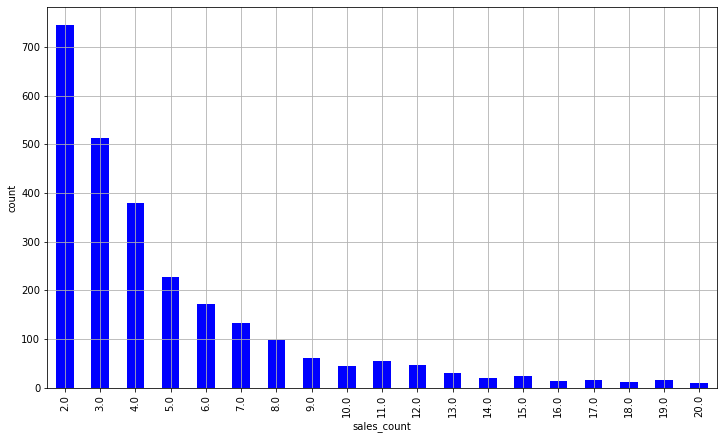

In [100]:
ax = summary.groupby("sales_count").count().sales_avg[:20].plot(
kind='bar',
color = "blue",
figsize = (12,7),
grid=True
)

ax.set_ylabel('count')
plt.show()

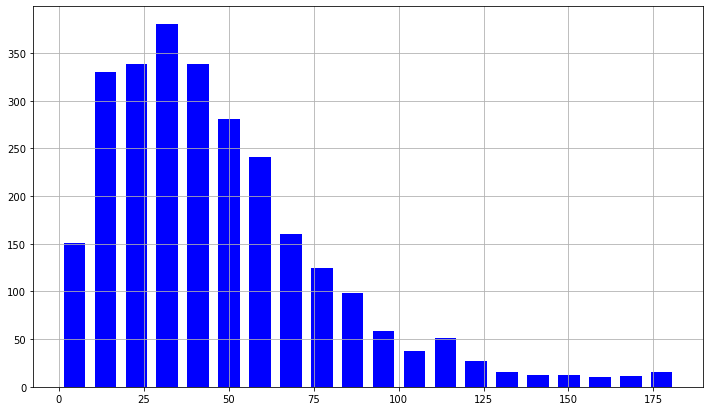

In [101]:
ax = summary["invoicedate_purch_freq"].hist(
    bins = 20,
    color = "blue",
    rwidth = 0.7,
    figsize = (12,7)
)

plt.show()

# Predicting 3 months CLV

In [102]:
orders.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

# Summary stats for 3 months interval

**RFM**

By definition, RFM represents:

- R(ecency): how recently did customer purchase?
- F(rquency): how often do customer purchase?
- M(onetary Value): how much do they spend (each time on average)

In [103]:
clv_interval = "3M"

data = orders.reset_index().groupby(["CustomerID", pd.Grouper(
    key="InvoiceDate",
    freq = clv_interval
)]).agg({
    "Sales" : ["sum", groupby_mean,groupby_count]
})

data.columns = ["_".join(col).lower() for col in data.columns ]
data = data.reset_index()
data.head()



,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0


# Recency

In [104]:
date_month_map = {str(x)[:10]: "M_%s" % (i+1) for i,x in enumerate(sorted(data.reset_index().InvoiceDate.unique(), reverse=True))}

In [105]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

# "M" Column

In [106]:
data['M'] = data['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [107]:
data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2


In [108]:
data.M.unique()

array(['M_4', 'M_5', 'M_3', 'M_2', 'M_1'], dtype=object)

# Creating features

In [109]:
features = pd.pivot_table(data.loc[data["M"] != 'M_1'], 
values = ['sales_sum', 'sales_avg', 'sales_count'],
 columns='M', 
 index = "CustomerID"
     )

In [110]:
features.head()

sales_avg                             sales_count                 \
M                M_2      M_3        M_4     M_5         M_2  M_3  M_4  M_5   
CustomerID                                                                    
12346.0          NaN      NaN  77183.600     NaN         NaN  NaN  1.0  NaN   
12347.0       584.91  509.385    475.390  711.79         1.0  2.0  1.0  1.0   
12348.0       310.00  367.000    227.440  892.80         1.0  1.0  1.0  1.0   
12350.0          NaN      NaN    334.400     NaN         NaN  NaN  1.0  NaN   
12352.0       316.25      NaN    312.362     NaN         2.0  NaN  5.0  NaN   

           sales_sum                             
M                M_2      M_3       M_4     M_5  
CustomerID                                       
12346.0          NaN      NaN  77183.60     NaN  
12347.0       584.91  1018.77    475.39  711.79  
12348.0       310.00   367.00    227.44  892.80  
12350.0          NaN      NaN    334.40     NaN  
12352.0       632.50      NaN   1561.81     NaN

In [111]:
features.columns = ["_".join(col) for col in features.columns]

In [112]:
features.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [113]:
response = data.loc[data["M"] == 'M_1', ["CustomerID",'sales_sum']]

In [114]:
response.columns = ['CustomerID','CLV_' + clv_interval]
response

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
...,...,...
9207,18274.0,175.92
9208,18276.0,335.86
9209,18277.0,110.38
9217,18283.0,766.21


# Sample set

In [115]:
sample_set = features.merge(
    response,
    left_index = True,
    right_on = 'CustomerID',
    how = 'left'
)

sample_set = sample_set.fillna(0)
sample_set.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


# Linear Regression 

In [116]:
target_val = 'CLV_' + clv_interval

all_features = [x for x in sample_set.columns if x not in ['CustomerID', target_val]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set[all_features],
    sample_set[target_val],
    test_size = 0.3
)

reg_fit = LinearRegression()
reg_fit.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
reg_fit.intercept_

1.2406547072239391

In [118]:
reg_fit.coef_

array([   0.16698808,   -0.57240231,    0.34929959,   -0.46736536,
         65.41068408,   81.84696669, -125.82589152,   -0.60761425,
          0.22552536,    0.27255063,    0.28241621,    0.69752947])

In [119]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,0.166988
1,sales_avg_M_3,-0.572402
2,sales_avg_M_4,0.349300
3,sales_avg_M_5,-0.467365
4,sales_count_M_2,65.410684
5,sales_count_M_3,81.846967
6,sales_count_M_4,-125.825892
7,sales_count_M_5,-0.607614
8,sales_sum_M_2,0.225525
9,sales_sum_M_3,0.272551


In [120]:
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [121]:
print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.7604743569748659
191.90053886803688


In [122]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.7605
Out-of-Sample R-Squared: 0.4528


In [123]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 191.9005
Out-of-Sample MSE: 181.5685


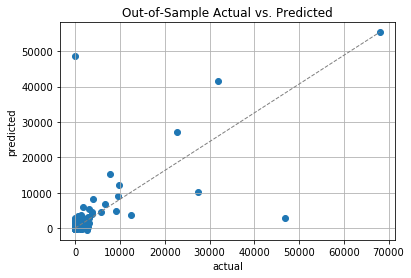

In [124]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()